In [1]:
# Adam Yang
# CS 525 Natural Language Processing
# Assignment 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud
import time
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag_sents, pos_tag

[nltk_data] Downloading package punkt to C:\Users\Adam
[nltk_data]     Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Adam
[nltk_data]     Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Adam
[nltk_data]     Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Adam
[nltk_data]     Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adam Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
print(sklearn.__version__)

1.1.1


In [3]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [4]:
print("The shape of the True dataset is", true_df.shape)
true_df.head()

The shape of the True dataset is (21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
print("The shape of the Fake dataset is", fake_df.shape)
fake_df.head()

The shape of the Fake dataset is (23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# DATA PREPROCESSING

In [5]:
# DROP UNNECESSARY COLUMNS
true_df = true_df.drop('title', axis=1)
true_df = true_df.drop('subject', axis=1)
true_df = true_df.drop('date', axis=1)
fake_df = fake_df.drop('title', axis=1)
fake_df = fake_df.drop('subject', axis=1)
fake_df = fake_df.drop('date', axis=1)

# CONVERT ALL TEXT TO LOWER CASE
true_df['text'] = true_df['text'].str.lower() # These get converted to Series objects
fake_df['text'] = fake_df['text'].str.lower()

# FILTER OUT SPECIAL CHARACTERS AND LEAVE ONLY WORDS
numTrueArticles = len(true_df['text'])
for i in range(numTrueArticles):
    true_df['text'][i] = re.sub('[^A-Za-z0-9]+', ' ', true_df['text'][i])

numFakeArticles = len(fake_df['text'])
for i in range(numFakeArticles):
    fake_df['text'][i] = re.sub('[^A-Za-z0-9]+', ' ', fake_df['text'][i])

In [6]:
# CREATE LABEL FOR MACHINE LEARNING MODELS
true_df['Label'] = 1
fake_df['Label'] = 0

# TASK 1: MOST COMMON WORDS

In [7]:
# TOKENIZE THE TEXT
true_df_task1 = true_df.copy()
fake_df_task1 = fake_df.copy()

true_df_task1['text_tokenized'] = true_df_task1['text'].apply(word_tokenize)
print("Successfully tokenized True text")
fake_df_task1['text_tokenized'] = fake_df_task1['text'].apply(word_tokenize)
print("Successfully tokenized Fake text")



Successfully tokenized True text
Successfully tokenized Fake text


In [8]:
global_tokens = []
# COLLECT ALL TOKENS IN TRUE DATASET
true_tokens = []
for sublist in true_df_task1['text_tokenized']:
    for token in sublist:
        true_tokens.append(token)
        global_tokens.append(token)
print("number of tokens in True dataset:", len(true_tokens))

number of tokens in True dataset: 8435968


In [9]:
# COLLECT ALL TOKENS IN FAKE DATASET
fake_tokens = []
for sublist in fake_df_task1['text_tokenized']:
    for token in sublist:
        fake_tokens.append(token)
        global_tokens.append(token)
print("number of tokens in Fake dataset:", len(fake_tokens))

number of tokens in Fake dataset: 10251160


In [10]:
# REMOVE STOP WORDS
stop_words = stopwords.words('english')

filtered_true_tokens = [word for word in true_tokens if word not in stop_words] # removing stop words for True
print("number of tokens in True dataset after removing stopwords:", len(filtered_true_tokens))

filtered_fake_tokens = [word for word in fake_tokens if word not in stop_words] # removing stop words for Fake
print("number of tokens in Fake dataset after removing stopwords:", len(filtered_fake_tokens))

filtered_global_tokens = [word for word in global_tokens if word not in stop_words] # removing stop words for both True and Fake

number of tokens in True dataset after removing stopwords: 5037632
number of tokens in Fake dataset after removing stopwords: 5724253


In [11]:
# LEMMATIZATION
lemmatizer = WordNetLemmatizer()

lemm_true_tokens = [lemmatizer.lemmatize(word) for word in filtered_true_tokens] # lemmatization for True
print("number of tokens in True dataset after lemmatization:", len(lemm_true_tokens))

lemm_fake_tokens = [lemmatizer.lemmatize(word) for word in filtered_fake_tokens] # lemmatization for Fake
print("number of tokens in Fake dataset after lemmatization:", len(lemm_fake_tokens))

lemm_global_tokens = [lemmatizer.lemmatize(word) for word in filtered_global_tokens] # lemmatization for both True and Fake

number of tokens in True dataset after lemmatization: 5037632
number of tokens in Fake dataset after lemmatization: 5724253


In [12]:
from collections import Counter

# GENERATE WORD CLOUDS DATASET
true_most_common = []
true_most_common_freq = []
fake_most_common = []
fake_most_common_freq = []
global_most_common = []
global_most_common_freq = []

true_most_common_list = Counter(lemm_true_tokens).most_common(100)
fake_most_common_list = Counter(lemm_fake_tokens).most_common(100)
global_most_common_list = Counter(lemm_global_tokens).most_common(100)
for i in range(100):
    true_most_common.append(true_most_common_list[i][0])
    true_most_common_freq.append(true_most_common_list[i][1])
    fake_most_common.append(fake_most_common_list[i][0])
    fake_most_common_freq.append(fake_most_common_list[i][1])
    global_most_common.append(global_most_common_list[i][0])
    global_most_common_freq.append(global_most_common_list[i][1])


data = {'True': true_most_common,
        'True Freq': true_most_common_freq,
        'Fake': fake_most_common,
        'Fake Freq': fake_most_common_freq,
        'Collection': global_most_common,
        'Collection Freq': global_most_common_freq}
mostCommonDF = pd.DataFrame(data)
mostCommonDF

,True,True Freq,Fake,Fake Freq,Collection,Collection Freq
0,said,99062,trump,79519,trump,134251
1,trump,54732,said,33763,said,132825
2,u,47110,president,28310,u,71655
3,state,37677,people,26657,state,61335
4,would,31605,one,25389,president,57038
...,...,...,...,...,...,...
95,comment,6143,never,6326,go,12190
96,according,6142,pic,6322,department,12151
97,police,6088,candidate,6266,need,12119
98,take,6086,2016,6265,russian,11984


# True Word Cloud

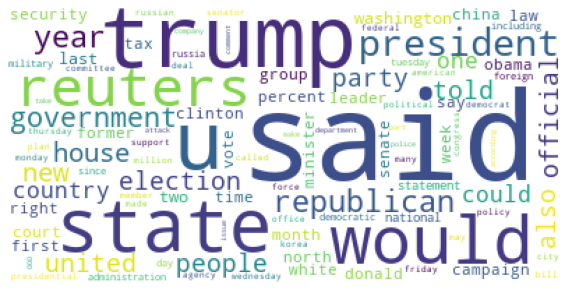

In [13]:
# Convert to Dictionary
true_data = dict(zip(mostCommonDF['True'].tolist(), mostCommonDF['True Freq'].tolist()))

# Generate Word Cloud
true_wc = WordCloud(background_color='white',max_words=100).generate_from_frequencies(true_data)
plt.figure(figsize=(10, 10))
plt.imshow(true_wc)
plt.axis('off')
plt.show()

# Fake Word Cloud

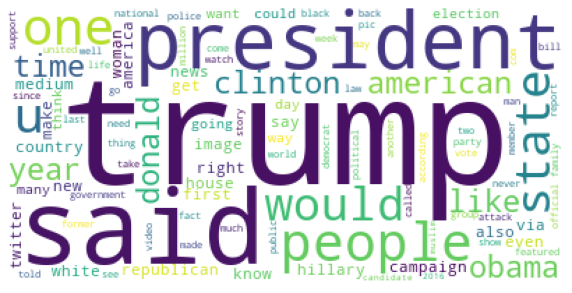

In [14]:
# Convert to Dictionary
fake_data = dict(zip(mostCommonDF['Fake'].tolist(), mostCommonDF['Fake Freq'].tolist()))

# Generate Word Cloud
fake_wc = WordCloud(background_color='white',max_words=100).generate_from_frequencies(fake_data)
plt.figure(figsize=(10, 10))
plt.imshow(fake_wc)
plt.axis('off')
plt.show()

# Collection Word Cloud

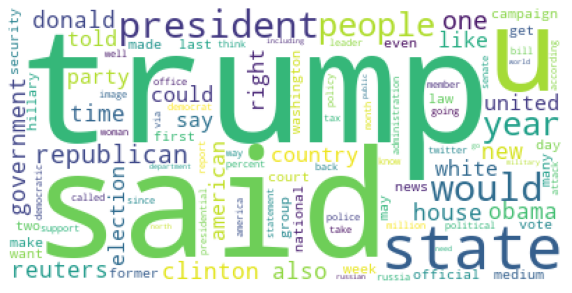

In [15]:
# Convert to Dictionary
global_data = dict(zip(mostCommonDF['Collection'].tolist(), mostCommonDF['Collection Freq'].tolist()))

# Generate Word Cloud
global_wc = WordCloud(background_color='white',max_words=100).generate_from_frequencies(global_data)
plt.figure(figsize=(10, 10))
plt.imshow(global_wc)
plt.axis('off')
plt.show()

# TASK 2: Machine Learning Models

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create copy of data for ML
true_df_ML_copy = true_df.copy()
fake_df_ML_copy = fake_df.copy()

# Concatenate the true and fake datasets together
df_ML_copy = pd.concat([true_df_ML_copy, fake_df_ML_copy])
df_ML_copy = df_ML_copy.reset_index(drop=True)
print("Dataset shape:", df_ML_copy.shape)

In [ ]:
from sklearn.model_selection import train_test_split
# Extract the labels
y = df_ML_copy['Label'].values
df_ML_copy.drop(['Label'], axis=1, inplace=True)



# PERFORM 70-30 SPLIT
X_train, X_test, y_train, y_test = train_test_split(df_ML_copy, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# PERFORM BAG-OF-WORDS (BoW) Method
vect = CountVectorizer(min_df=10)

X_train_BoW = vect.fit_transform(X_train)
X_test_BoW = vect.transform(X_test)

print('X_train_review_bow shape: ', X_train_BoW.shape)
print('X_test_review_bow shape: ', X_test_BoW.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# PERFORM TF-IDF ANALYSIS OF DATASET
vectorizer = TfidfVectorizer(min_df=10)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print('X_train_review_tfidf shape: ', X_train_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_tfidf.shape)

In [ ]:
# MULTINOMIAL NAIVE BAYES MODEL USING BAG-OF-WORDS FEATURE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

multiNB_clf = MultinomialNB()
multiNB_clf.fit(X_train_BoW, y_train)

y_pred = multiNB_clf.predict(X_test_BoW) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
# MULTINOMIAL NAIVE BAYES MODEL USING TF-IDF FEATURE
multiNB_clf = MultinomialNB(alpha=1)
multiNB_clf.fit(X_train_tfidf, y_train)

y_pred = multiNB_clf.predict(X_test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
# LOGISTIC REGRESSION MODEL WITH BAG-OF-WORDS FEATURE
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(penalty='l1', solver='liblinear')
log_regr.fit(X_train_BoW, y_train)

y_pred = log_regr.predict(X_test_BoW)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
# LOGISTIC REGRESSION MODEL WITH TF-IDF FEATURE
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(penalty='l1', solver='liblinear')
log_regr.fit(X_train_tfidf, y_train)

y_pred = log_regr.predict(X_test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
# K-NEAREST NEIGHBORS MODEL WITH TF-IDF FEATURE
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_tfidf, y_train)

y_pred = knn_clf.predict(X_test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
# MULTI-LAYER PERCEPTRON MODEL WITH TF-IDF FEATURE
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(activation='logistic', 
                        solver='adam', 
                        alpha=0.005, 
                        hidden_layer_sizes=(10),
                        batch_size=20,
                        verbose=True,
                        max_iter=40)
mlp_clf.fit(X_train_tfidf, y_train)

y_pred = mlp_clf.predict(X_test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

# TASK 3: ENHANCED NLP FEATURES

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create copy of data for ML
true_df_task3 = true_df.copy()
fake_df_task3 = fake_df.copy()

# Concatenate the true and fake datasets together
df_task3_copy = pd.concat([true_df_task3, fake_df_task3])
df_task3_copy = df_task3_copy.reset_index(drop=True)
print("Dataset shape:", df_task3_copy.shape)


# Tokenize words
df_task3_copy['text_tokenized'] = df_task3_copy['text'].apply(word_tokenize)


In [ ]:
# Remove Stop-words
stop_words = stopwords.words('english')
df_task3_copy['text_no_stopwords'] = df_task3_copy['text_tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

In [ ]:
# POS Tagging
start = time.time()
df_task3_copy['text_pos'] = pos_tag_sents(df_task3_copy['text_no_stopwords']) # .apply(lambda x: pos_tag(x))
print(time.time() - start)

In [ ]:
# FILTERS
nounsList = ['NN', 'NNS', 'NNP', 'NNPS'] # Nouns
verbsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VPZ'] # Verbs
adjList = ['JJ', 'JJR', 'JJS'] # Adjectives
nounAndVerbsList = nounsList + verbsList # NOUN AND VERB FILTER
nounAndAdjList = nounsList + adjList # NOUN AND ADJECTIVE FILTER
NVAList = nounsList + verbsList + adjList # NOUN, VERB, AND ADJECTIVE FILTER

# NOUN AND ADJECTIVE FILTER
df_task3_copy['text_N'] = df_task3_copy['text_pos'].apply(lambda words: ' '.join([pair[0] for pair in words if pair[1] not in nounsList]))
df_task3_copy['text_NV'] = df_task3_copy['text_pos'].apply(lambda words: ' '.join([pair[0] for pair in words if pair[1] not in nounAndVerbsList]))
df_task3_copy['text_NA'] = df_task3_copy['text_pos'].apply(lambda words: ' '.join([pair[0] for pair in words if pair[1] not in nounAndAdjList]))
df_task3_copy['text_NVA'] = df_task3_copy['text_pos'].apply(lambda words: ' '.join([pair[0] for pair in words if pair[1] not in NVAList]))


In [ ]:
df_task3_copy.head()

In [ ]:
from sklearn.model_selection import train_test_split
# Extract the labels
y = df_task3_copy['Label'].values
df_task3_copy.drop(['Label'], axis=1, inplace=True)

# PERFORM 70-30 SPLIT
X_train, X_test, y_train, y_test = train_test_split(df_task3_copy, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# PERFORM BAG-OF-WORDS (BoW) Method
vect = CountVectorizer(min_df=10)

X_train_BoW = vect.fit_transform(X_train['text_N'])
X_test_BoW = vect.transform(X_test['text_N'])

print('X_train_review_bow shape: ', X_train_BoW.shape)
print('X_test_review_bow shape: ', X_test_BoW.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
# PERFORM TF-IDF ANALYSIS OF DATASET
vectorizer = TfidfVectorizer(min_df=10)

X_train_tfidf = vectorizer.fit_transform(X_train['text_N'])
X_test_tfidf = vectorizer.transform(X_test['text_N'])

print('X_train_review_tfidf shape: ', X_train_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_tfidf.shape)

In [ ]:
# MULTINOMIAL NAIVE BAYES MODEL
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
print("BAG OF WORDS METHOD:")
multiNB_clf = MultinomialNB(alpha=1)
multiNB_clf.fit(X_train_BoW, y_train)

y_pred = multiNB_clf.predict(X_test_BoW)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))
print("\n")

print("TF-IDF METHOD:")
multiNB_clf = MultinomialNB(alpha=1)
multiNB_clf.fit(X_train_tfidf, y_train)

y_pred = multiNB_clf.predict(X_test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression

print("BAG OF WORDS METHOD:")
log_regr = LogisticRegression(penalty='l1', solver='liblinear')
log_regr.fit(X_train_BoW, y_train)

y_pred = log_regr.predict(X_test_BoW)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))
print("\n")
print("TF-IDF METHOD:")
log_regr = LogisticRegression(penalty='l1', solver='liblinear')
log_regr.fit(X_train_tfidf, y_train)

y_pred = log_regr.predict(X_test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))

In [ ]:
tn, fp, fn, tp = 6912, 203, 213, 6152
print(tn + fp + fn + tp)
print("Accuracy Score:", (tn+tp)/(tn + fp + fn + tp))
print("Precision Score:", tp/(tp+fp))
print("Recall Score:", tp/(tp+fn))